<a href="https://colab.research.google.com/github/adkprakash/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [54]:
from nltk.corpus import stopwords

In [55]:
from google.colab import drive

In [56]:
# Mount your Google Drive (authorization required)
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Path to your CSV file in Google Drive
data_path='drive/My Drive/Dataset'

In [58]:
# Read the CSV file using pandas
data = pd.read_csv(data_path+'/netflix_reviews.csv')

In [59]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,d123acad-4c26-41c2-97b0-592f46758853,Nikshia Bhaiwa,This is amazing app,5,0,8.114.0 build 19 50680,2024-05-18 23:04:55,8.114.0 build 19 50680
1,3370bed7-4d52-4e14-b9b8-0282138b708e,Pilot Seleam,"Unsubscribing ! , now i cant open it on my oth...",1,0,8.114.0 build 19 50680,2024-05-18 22:41:23,8.114.0 build 19 50680
2,87bc75a8-81b9-4220-8843-05d0d58f154e,nomthandazo patience,I've been trying to install this app it doesn'...,1,0,8.101.1 build 7 50601,2024-05-18 22:37:34,8.101.1 build 7 50601
3,2cb4ce60-ba5a-4a8b-b878-3df7e41d1b02,Eseme Kelly,Great App 🔥,5,0,8.108.0 build 2 50642,2024-05-18 22:33:34,8.108.0 build 2 50642
4,9ebc48ff-a622-45e8-a3b3-881f612fd016,Eitan Craft24,No me dejaba ver nada porque no estaba en mi casa,1,0,8.114.0 build 19 50680,2024-05-18 21:59:12,8.114.0 build 19 50680


In [60]:
# Dropping unwanted column by name
drop_column=['reviewId','userName','reviewCreatedVersion','at','appVersion']
data = data.drop(drop_column, axis=1)

In [61]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,5,0
1,"Unsubscribing ! , now i cant open it on my oth...",1,0
2,I've been trying to install this app it doesn'...,1,0
3,Great App 🔥,5,0
4,No me dejaba ver nada porque no estaba en mi casa,1,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109211 entries, 0 to 109210
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   content        109211 non-null  object
 1   score          109211 non-null  int64 
 2   thumbsUpCount  109211 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [63]:
data['score'].value_counts()

score
1    42775
5    30635
4    13576
3    11698
2    10527
Name: count, dtype: int64

<Axes: xlabel='score', ylabel='count'>

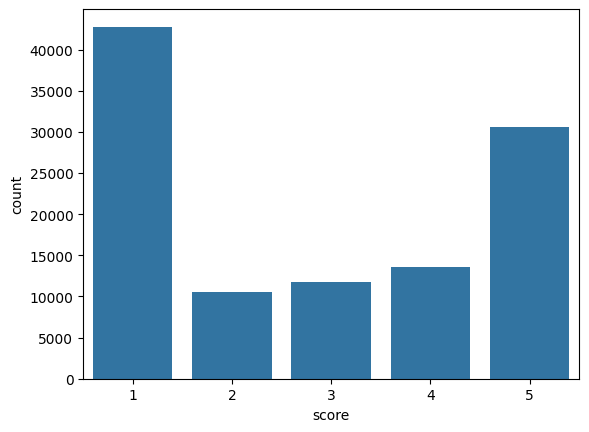

In [64]:
sns.countplot(x='score',data=data)

In [65]:
# Count unique values
num_unique_values = data['thumbsUpCount'].nunique()

# Print the result
print(f"Number of unique values in 'thumbsUpCount': {num_unique_values}")

Number of unique values in 'thumbsUpCount': 899


In [66]:
data['thumbsUpCount'].describe()

count    109211.000000
mean         10.798473
std         102.097338
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8032.000000
Name: thumbsUpCount, dtype: float64

In [67]:
data['thumbsUpCount'].mean()

10.79847268132331

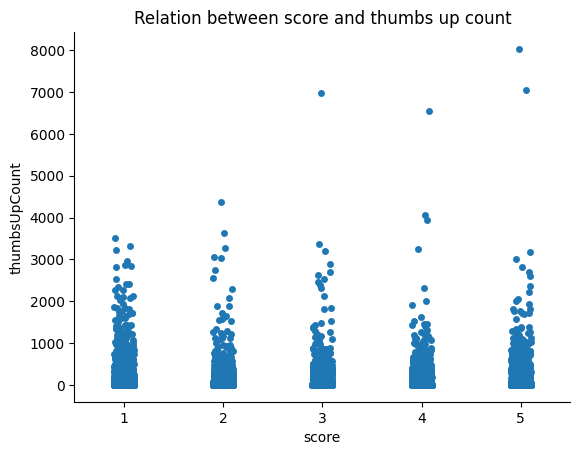

In [68]:
# Creating a strip plot
sns.stripplot(
    x = "score",
    y = "thumbsUpCount",
    data=data
)

# Customize the plot
sns.despine()  # Remove grid lines for cleaner visuals
plt.title("Relation between score and thumbs up count")  # Add a title

# Display the plot
plt.show()


In [69]:
# Setting a threshold score to separate positive and negative reviews
threshold = 3

def convert_to_review(score):
  if score < threshold:
    return "negative"
  else:
    return "positive"

# Applying the conversion function to the "score" column
data['score'] = data['score'].apply(convert_to_review)

In [70]:
data['score'].value_counts()

score
positive    55909
negative    53302
Name: count, dtype: int64

In [71]:
data.head()

,content,score,thumbsUpCount
0,This is amazing app,positive,0
1,"Unsubscribing ! , now i cant open it on my oth...",negative,0
2,I've been trying to install this app it doesn'...,negative,0
3,Great App 🔥,positive,0
4,No me dejaba ver nada porque no estaba en mi casa,negative,0


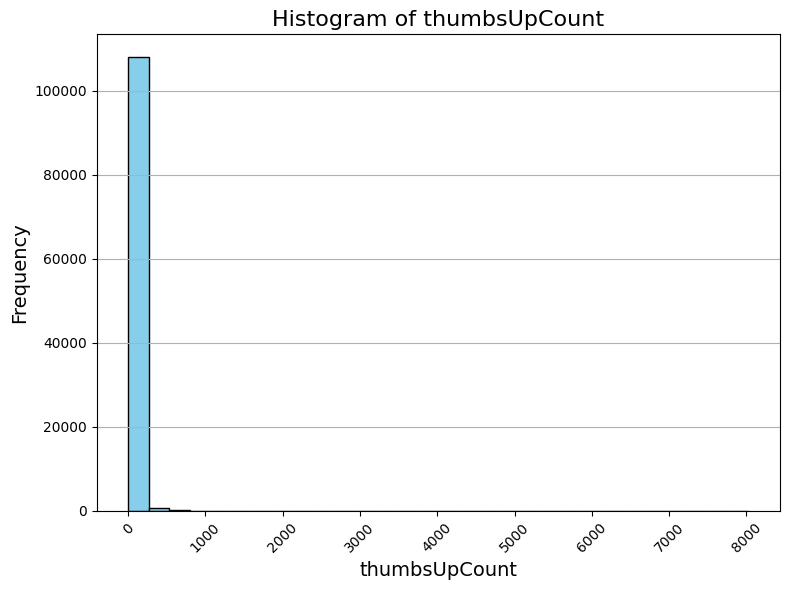

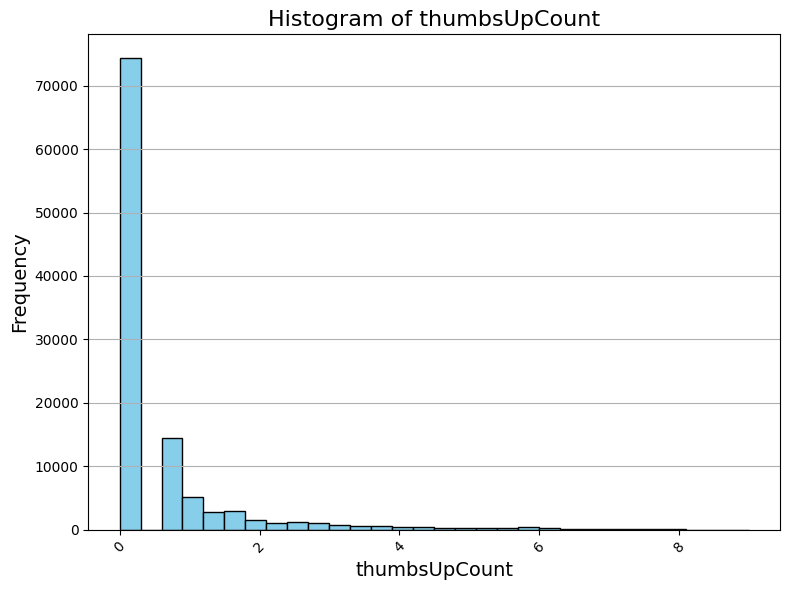

In [80]:
# Creating a hsitogram of thumbsUpCount
plt.figure(figsize=(8,6))
plt.hist(data['thumbsUpCount'], bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a hsitogram of thumbsUpCount after normalization using log
plt.figure(figsize=(8,6))
plt.hist(np.log(data['thumbsUpCount']+1), bins=30 ,color='skyblue',edgecolor='black')
plt.title(f'Histogram of thumbsUpCount',fontsize=16)
plt.xlabel('thumbsUpCount',fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text Preprocessing

In [82]:
# Lowercase the 'content' column
data['content'] = data['content'].str.lower()

In [83]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,"unsubscribing ! , now i cant open it on my oth...",negative,0
2,i've been trying to install this app it doesn'...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [85]:
import string
# Define function to remove punctuation
def remove_punctuation(text):

  punctuation = string.punctuation
  return ''.join([char for char in text if char not in punctuation])

# Apply the function to the 'content' column (vectorized)
data['content'] = data['content'].apply(remove_punctuation)

In [86]:
data.head()

,content,score,thumbsUpCount
0,this is amazing app,positive,0
1,unsubscribing now i cant open it on my other...,negative,0
2,ive been trying to install this app it doesnt ...,negative,0
3,great app 🔥,positive,0
4,no me dejaba ver nada porque no estaba en mi casa,negative,0


In [88]:
nltk.download('stopwords')
# Defining function to remove stop words
def remove_stop_words(text):
  stop_words_english = stopwords.words('english')
  words = [word for word in text.lower().split() if word not in stop_words_english]
  return ' '.join(words)

# Apply the function to the 'Text' column (vectorized)
data['content'] = data['content'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [89]:
data.head()

,content,score,thumbsUpCount
0,amazing app,positive,0
1,unsubscribing cant open houses iptv works fine,negative,0
2,ive trying install app doesnt work 🤷🏽,negative,0
3,great app 🔥,positive,0
4,dejaba ver nada porque estaba en mi casa,negative,0
